## Random Forest practical lab
Author: Carlos MIRANDA <carlos.miranda_lopez@insa-rouen.fr>

In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Loading data
from sklearn.datasets import load_digits, make_classification, load_breast_cancer

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Validation and testing
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

# Other settings
np.random.seed(30996)
%matplotlib inline

In [2]:
# Load digits data (8x8 grayscale arrays representing hand-written digits)
data = load_digits()

# Experiment 1

This experiment aims at introducing three tree-based classifiers: **_Simple decision tree_**, **_Bagging Forest_** and **_Random Forest_**.

A single decision tree is a **high-variance low-bias model**. This means that the model is very dependent on data: a small change can produce quite different estimations and predictions. If no parameters are specified, the tree is not pruned (we get a _maximal tree_), and if this model is complicated (too many nodes/leafs/levels), then it tends to overfit.

One idea is to prune the tree, i.e. remove branches and nodes using different criteria. However, most of the model problems cannot be solved this way.

A preferred method is that of using trees in _Ensemble models_. Here, we use two ensemble models: **_Bagging Forest_** and **_Random Forest_**. The former amounts to _Bootstrap Aggregation_, i.e. one takes _n_ bootstrap samples of the original sample and train _n_ estimators, then each model _votes_ (produces an estimation) and the answer with most votes is chosen. The bootstrap method helps in **reducing the high-variance** of the model, but the trees in this model are maximal trees, use a greedy approach using all the features at each splitting, and their estimations can be correlated.

Random Forests aim at reducing this correlation by introducing a parameter corresponding to the maximum number of features evaluated for each split. That is, at each split, only a reduced number _m_ of randomly selected features are considered for splitting. In this, estimators correlation is greatly reduced.

In [3]:
kf = KFold(n_splits = 5) # 5-fold cross-validation

In [4]:
# Single decision tree

s = 0
t = time()
for train, test in kf.split(data.data):
    clf = DecisionTreeClassifier()
    clf.fit(data.data[train], data.target[train])
    s += clf.score(data.data[test], data.target[test])
t = time() - t
s /= 5
print("Single Decision Tree")
print("Mean accuracy : {:.4f}".format(s))
print("Elapsed time : {:.5f} s".format(t))

Single Decision Tree
Mean accuracy : 0.7852
Elapsed time : 0.19043 s


In [5]:
# Bagging Forest

s = 0
t = time()
for train, test in kf.split(data.data):
    clf = BaggingClassifier()
    clf.fit(data.data[train], data.target[train])
    s += clf.score(data.data[test], data.target[test])
t = time() - t
s /= 5
print("Bagging Forest")
print("Mean accuracy : {:.4f}".format(s))
print("Elapsed time : {:.5f} s".format(t))

Bagging Forest
Mean accuracy : 0.8837
Elapsed time : 0.91813 s


In [6]:
# Random Forest

s = 0
t = time()
for train, test in kf.split(data.data):
    clf = RandomForestClassifier()
    clf.fit(data.data[train], data.target[train])
    s += clf.score(data.data[test], data.target[test])
t = time() - t
s /= 5
print("Random Forest")
print("Mean accuracy : {:.4f}".format(s))
print("Elapsed time : {:.5f} s".format(t))

Random Forest
Mean accuracy : 0.8965
Elapsed time : 0.23415 s


In [7]:
# Comparison using 50 trees

s_single, s_bagging, s_rf = 0, 0, 0
t_single, t_bagging, t_rf = 0, 0, 0
for train, test in kf.split(data.data):
    t_s = time()
    single = DecisionTreeClassifier()
    single.fit(data.data[train], data.target[train])
    t_single += time() - t_s
    s_single += single.score(data.data[test], data.target[test])
    
    t_b = time()
    bagging = BaggingClassifier(n_estimators = 50)
    bagging.fit(data.data[train], data.target[train])
    t_bagging += time() - t_b
    s_bagging += bagging.score(data.data[test], data.target[test])
    
    t_r = time()
    rf = RandomForestClassifier(n_estimators = 50)
    rf.fit(data.data[train], data.target[train])
    t_rf += time() - t_r
    s_rf += rf.score(data.data[test], data.target[test])

s_single /= 5
s_bagging /= 5
s_rf /= 5
t_single /= 5
t_bagging /= 5
t_rf /= 5

print("Mean accuracy comparison for decision trees classifiers")
print("Single Deecision Tree : {:.4f}".format(s_single))
print("Bagging Forest : {:.4f}".format(s_bagging))
print("Random Forest : {:.4f}".format(s_rf))

print("Mean time comparison for decision trees classifiers")
print("Single Deecision Tree : {:.5f} s".format(t_single))
print("Bagging Forest : {:.5f} s".format(t_bagging))
print("Random Forest : {:.5f} s".format(t_rf))

Mean accuracy comparison for decision trees classifiers
Single Deecision Tree : 0.7880
Bagging Forest : 0.9138
Random Forest : 0.9344
Mean time comparison for decision trees classifiers
Single Deecision Tree : 0.02064 s
Bagging Forest : 0.70462 s
Random Forest : 0.15902 s


As expected, the Random Forest classifier performs better than the other models. The Single Decision Tree classifier produces rather good results (mean accuracy between 70% and 80%) and takes little time to be built and fitted. Bagging Forest classifier performs better (mean accuracy roughly above 90%) but takes much more time to be built and fitted. Finally, Random Forest does slightly better than Bagging Forest (between 93% and 94% mean accuracy), and takes less time to be built and trained.

After some trials, results fluctuate the most for the Single Decision Tree, followed by Bagging Forest and finally Random Forest. But this can be seen latter on in experiment 2.

# Experiment 2

This experiment aims at studying the impact of the number of trees (or estimators) in a Random Forest model.

In [8]:
rf = RandomForestClassifier(random_state = 30996)

means = []
stds = []
for i in range(1, 51, 2):
    rf.set_params(n_estimators = i)
    tmp = []
    for train, test in kf.split(data.data):
        rf.fit(data.data[train], data.target[train])
        tmp.append(rf.score(data.data[test], data.target[test]))
    means.append(np.mean(tmp))
    stds.append(np.std(tmp))

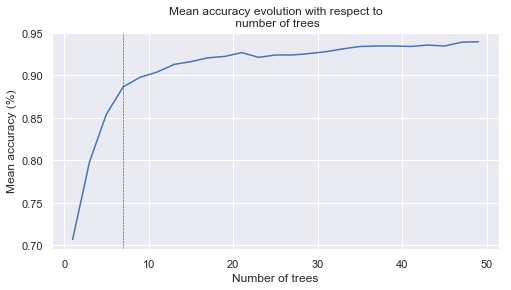

In [9]:
import seaborn as sns
sns.set(context = "notebook", style = "darkgrid")

f = plt.figure(1, figsize = (8, 4))
sns.lineplot(x = np.array(range(1, 51, 2)), y = means, figure = f)
plt.axvline(7, 0, linestyle = "dashed", color = "red", linewidth = 0.6)
plt.title("Mean accuracy evolution with respect to\n number of trees")
plt.xlabel("Number of trees")
_ = plt.ylabel("Mean accuracy (%)")

One can see the mean accuracy grows really fast between 1 and 7 trees (from 0.71 to 0.88) and then increases rather slowly until 0.94.

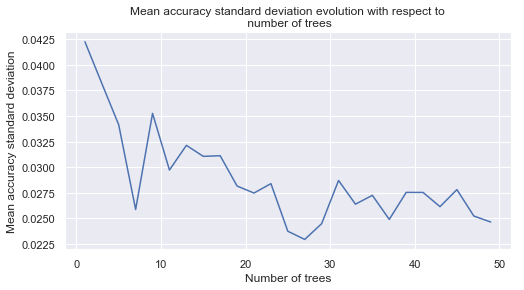

In [10]:
f = plt.figure(2, figsize = (8, 4))
sns.lineplot(x = np.array(range(1, 51, 2)), y = stds, figure = f)
plt.title("Mean accuracy standard deviation evolution with respect to\n number of trees")
plt.xlabel("Number of trees")
_ = plt.ylabel("Mean accuracy standard deviation")

One can see standard deviation is rather small and initially decreases when the number of trees increases, but then stagnates and revolves around 0.0275.

# Experiment 3

Grid search is an exhaustive searching method. The user provides a list of values or a domain for hyperparameters and sweeps over all possible combinations.

Here, we study two hyperparameters to build a Random Forest: the _minimum samples in a leaf_ and the _maximum number of features_. The first one corresponds to the minimum number of samples required to be at a leaf node. The latter determines the number of features to randomly choose when looking for the best split.

In our application, using floats for _min_\__samples_\__leaf_ means that $ceil(min\_samples\_leaf * n\_samples)$ will be the least required amount of samples to be at a leaf node. So we take values that will correspond to 10-11 leaf nodes (0.1) to 2-3 leaf nodes (0.5).

As for _max_\__features_, knowing the dimensions of the images are 8 in width and 8 in length, we take 1 (only one pixel) to 64 (the whole image).

In [11]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 30996)

parameters = {
    'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features' : [1, 8, 16, 32, 64]
}

clf = GridSearchCV(rf, parameters, cv = 5)
_ = clf.fit(data.data, data.target)

In [12]:
rank_test_score = clf.cv_results_['rank_test_score'] - 1
rank_idx = np.argsort(rank_test_score)
mean_test_score = clf.cv_results_['mean_test_score']
best_scores = np.zeros(len(rank_test_score))
best_scores = mean_test_score[rank_idx]
best_params = np.array(clf.cv_results_['params'])[rank_idx]

print("Grid Search Ranking")
for i, v in enumerate(list(zip(best_scores, best_params))[:10]):
    score, best_p = v
    print("{:d}. Max features : {:d} -- Min samples leaf : {:.1f} -- Score : {:.4f}"
          .format(i+1, best_p['max_features'], best_p['min_samples_leaf'], score))

Grid Search Ranking
1. Max features : 8 -- Min samples leaf : 0.1 -- Score : 0.8080
2. Max features : 1 -- Min samples leaf : 0.1 -- Score : 0.7468
3. Max features : 16 -- Min samples leaf : 0.1 -- Score : 0.7451
4. Max features : 8 -- Min samples leaf : 0.2 -- Score : 0.7312
5. Max features : 1 -- Min samples leaf : 0.2 -- Score : 0.7168
6. Max features : 32 -- Min samples leaf : 0.1 -- Score : 0.6889
7. Max features : 8 -- Min samples leaf : 0.3 -- Score : 0.6878
8. Max features : 16 -- Min samples leaf : 0.2 -- Score : 0.6650
9. Max features : 1 -- Min samples leaf : 0.3 -- Score : 0.6177
10. Max features : 16 -- Min samples leaf : 0.3 -- Score : 0.6166


This ranking lets us see that increasing the _min_\__samples_\__leafs_ decreases the accuracy. As stated before, this hypterparameter directly relates to the number of leafs the embedded trees will have, so one can easily grasp why increasing its value (decreasing the number of classification labels) leads to worse performances.

Moreover, one can notice the number of features does not really play an important role, which is rather counter-intuitive. Running the experiment multiple times, with different random states, the three top-ranked couples always come on top, but the actual rank may vary. I left a random state showing this (first comes 8, then 1, then 16).

# Experiment 4

This experiment aims at studying the similarity measure embedded within Random Forests.

The **apply** method gives the indices of the leaves where an observation is classified for each tree in the Random Forest. Thus, one can use this to compute the difference between each couple of instances on the training set. It is useful to notice that similarity is a symmetric mapping, so one does only need to compute half a matrix.

In [13]:
def similarity(rf, trainset):
    """
    Given a random forest fitted model and its corresponding training set, produce a similarity measure matrix.
    """
    n = len(trainset)
    p = np.zeros((n, n))
    for i in range(n):
        leaves_i = rf.apply([trainset[i]])
        for j in range(i, n):
            leaves_j = rf.apply([trainset[j]])
            sim_val = np.mean(leaves_i == leaves_j) # mean number of equally classified
            p[i][j] = sim_val
            p[j][i] = sim_val
    return p

In [14]:
rf = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 0.1, max_features = 8)
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size = 0.1, random_state = 30996)
_ = rf.fit(x_train, y_train)

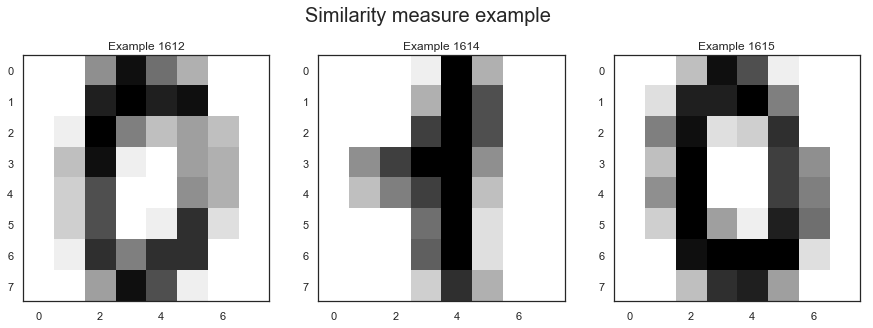

In [15]:
with sns.axes_style("white"):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    fig.suptitle('Similarity measure example', fontsize = 20)
    ax1.set_title("Example {}".format(len(x_train) - 5))
    ax1.imshow(x_train[-5].reshape(8, 8), cmap = plt.cm.gray_r, interpolation='nearest')
    ax2.set_title("Example {}".format(len(x_train) - 3))
    ax2.imshow(x_train[-3].reshape(8, 8), cmap = plt.cm.gray_r, interpolation='nearest')
    ax3.set_title("Example {}".format(len(x_train) - 2))
    ax3.imshow(x_train[-2].reshape(8, 8), cmap = plt.cm.gray_r, interpolation='nearest')

Here, I have chosen three examples. Two are similar (they are both 0) and the one in the middle is different (it is a 1). Therefore, we should find similarities measure close to 1 for the 0s, and close to 0 between the 1 and the 0s.

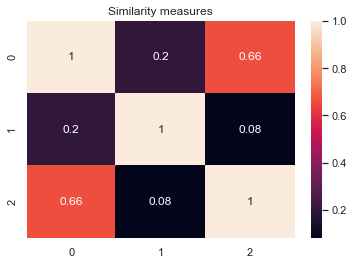

In [16]:
simatrix = similarity(rf, [x_train[-2], x_train[-3], x_train[-5]])
h = sns.heatmap(simatrix, annot = True)
_ = h.set_title("Similarity measures")

The current example confirms the similarity measure embedded within the Random Forest. The similarity measure between the 0s is close to 1 and the similarity measures between both 0s and the 1 are close to 0.

# Experiment 5

This final experiment aims at testing the variable importance measure embedded in Random Forests.

Feature importance can be seen in a Single Decision Tree from height at which a split using a particular feature takes place and the reoccurrence of features. That is, the most important features are used at the top of the tree splits and are used more than once.

However, with Random Forests, this interpretation is not so easily done. In this case, different measure can be used: Increase of Mean Squared Error (%IncMSE), Mean Decrease Impurity (MDI), ...

By default, **RandomForestClassifier** uses MDI, which is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble.

In [17]:
X, y = make_classification(n_samples = 1000, n_features = 20,
                                 n_informative = 5, n_redundant = 0,
                                 n_repeated = 0, n_classes = 2,
                                random_state = 30996, shuffle = False)

rf = RandomForestClassifier(random_state = 30996)
_ = rf.fit(X, y)

In [18]:
def rank_features(rf, nb_features):
    individual_importances = np.zeros((rf.n_estimators, nb_features))
    for i, tree in enumerate(rf.estimators_):
        individual_importances[i, :] = tree.feature_importances_
    features_indices = np.argsort(-rf.feature_importances_)
    stds = individual_importances.std(axis = 0)
    ranked = np.zeros((nb_features, 4))
    for i, imp in enumerate(rf.feature_importances_[features_indices]):
        var_idx = features_indices[i] + 1
        ranked[i, :] = [i + 1, var_idx, imp, stds[var_idx - 1]]
    return ranked

In [19]:
ranked = rank_features(rf, 20)
for r in ranked:
    print("{:d}. Variable {:d} -- Importance (MDI) : {:.4f} -- Std : {:.4f}".format(int(r[0]), int(r[1]), r[2], r[3]))

1. Variable 3 -- Importance (MDI) : 0.3821 -- Std : 0.1111
2. Variable 5 -- Importance (MDI) : 0.1360 -- Std : 0.0461
3. Variable 2 -- Importance (MDI) : 0.0922 -- Std : 0.0657
4. Variable 4 -- Importance (MDI) : 0.0607 -- Std : 0.0296
5. Variable 1 -- Importance (MDI) : 0.0437 -- Std : 0.0155
6. Variable 13 -- Importance (MDI) : 0.0229 -- Std : 0.0077
7. Variable 9 -- Importance (MDI) : 0.0227 -- Std : 0.0142
8. Variable 14 -- Importance (MDI) : 0.0223 -- Std : 0.0092
9. Variable 10 -- Importance (MDI) : 0.0220 -- Std : 0.0080
10. Variable 19 -- Importance (MDI) : 0.0216 -- Std : 0.0083
11. Variable 16 -- Importance (MDI) : 0.0214 -- Std : 0.0134
12. Variable 20 -- Importance (MDI) : 0.0192 -- Std : 0.0115
13. Variable 8 -- Importance (MDI) : 0.0187 -- Std : 0.0101
14. Variable 6 -- Importance (MDI) : 0.0185 -- Std : 0.0112
15. Variable 11 -- Importance (MDI) : 0.0177 -- Std : 0.0107
16. Variable 7 -- Importance (MDI) : 0.0176 -- Std : 0.0125
17. Variable 17 -- Importance (MDI) : 0.01

According to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html), without shuffling, the features are stacked as follows : informative, redundant, repeated, random. The rank clearly shows that the first 5 features are the most important, i.e. the most informative, which is what we expected.

Moreover we see than these informative features have greater standard deviation values (for importance), which accounts for more dispersion. The rest of the features have standard deviations arround 0.01. This suggests that not important features are weighted as not important by most trees, but there is a relatively higher variability for important features.


Now, we study the **breast\_cancer** dataset.

In [20]:
data = load_breast_cancer()
rf = RandomForestClassifier(random_state = 30996)
_ = rf.fit(data.data, data.target)

In [21]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [22]:
ranked = rank_features(rf, 30)
for r in ranked:
    print("{:d}. Variable {:d} -- Importance (MDI) : {:.4f} -- Std : {:.4f}".format(int(r[0]), int(r[1]), r[2], r[3]))

1. Variable 24 -- Importance (MDI) : 0.2326 -- Std : 0.3162
2. Variable 4 -- Importance (MDI) : 0.1793 -- Std : 0.2736
3. Variable 8 -- Importance (MDI) : 0.1027 -- Std : 0.1987
4. Variable 21 -- Importance (MDI) : 0.0926 -- Std : 0.1929
5. Variable 23 -- Importance (MDI) : 0.0823 -- Std : 0.1995
6. Variable 11 -- Importance (MDI) : 0.0394 -- Std : 0.1183
7. Variable 7 -- Importance (MDI) : 0.0368 -- Std : 0.0753
8. Variable 27 -- Importance (MDI) : 0.0361 -- Std : 0.0497
9. Variable 28 -- Importance (MDI) : 0.0338 -- Std : 0.0632
10. Variable 25 -- Importance (MDI) : 0.0218 -- Std : 0.0284
11. Variable 3 -- Importance (MDI) : 0.0173 -- Std : 0.0241
12. Variable 22 -- Importance (MDI) : 0.0159 -- Std : 0.0180
13. Variable 2 -- Importance (MDI) : 0.0144 -- Std : 0.0176
14. Variable 1 -- Importance (MDI) : 0.0110 -- Std : 0.0187
15. Variable 26 -- Importance (MDI) : 0.0109 -- Std : 0.0136
16. Variable 14 -- Importance (MDI) : 0.0106 -- Std : 0.0138
17. Variable 13 -- Importance (MDI) : 0

This ranking shows that the most influential variables are 24 (Area (Worst)), 4 (Area (Mean)), 8 (Concave Points (mean)), 23 (Perimeter (Worst)) and 21 (Radius (Worst)). These all relate to the size of the cell nuclei in the analyzed images. Next there are some variables related to the nuclei shape.

One can notice that standard deviation decreases as importance decreases. Again, this would suggest that importance of important variables is harder to determine for the forest, while not important features are seen as such by most trees in the forest.